In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import sin, sqrt, exp, cos

In [11]:
methods = ["RK45", "RK23", "DOP853", "Radau"] # can also add RK23, DOP853, Radau, BDF, LSODA
t_eval = np.array([ x for x in range(0, 100) ]) / 10
tolerances =  [1e-5]

In [5]:
def experiment(model, y0, t_span, solution):
    for method in methods:
        for tol in tolerances:
            atol = tol
            rtol = tol
            dense = solve_ivp(model, t_span, y0, method=method, atol=atol, rtol=rtol, dense_output=True)
            sol = solution(t_eval)
            computed = dense.sol(t_eval)
            abs_err = np.abs(computed[0] - sol)
            rel_err = [ abs(abs_err[i] / computed[0][i])  for i in range(len(t_eval)) ]
        
            plt.figure()
            plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")
            for t in dense.t: plt.axvline(x=t)
            plt.axhline(y=np.log10(atol), label="abs tol", color="g")
            plt.title(f"{method} at atol of {atol}")
            plt.legend()
            plt.show()


            plt.figure()
            plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")
            for t in dense.t: plt.axvline(x=t)
            plt.axhline(y=np.log10(rtol), label="rel tol", color="g")
            plt.title(f"{method} at rtol of {rtol}")
            plt.legend()
            plt.show()


C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


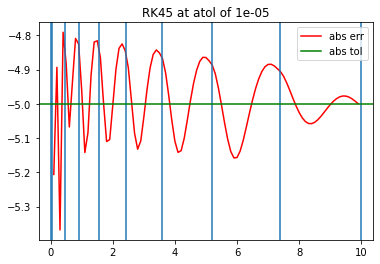

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


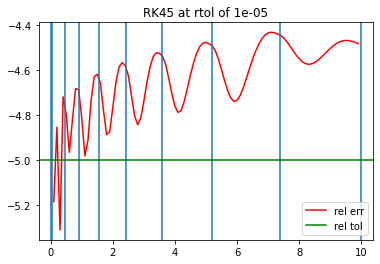

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


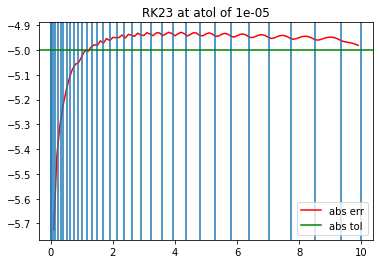

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


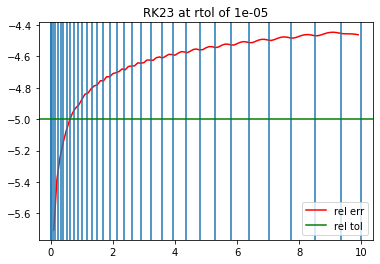

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


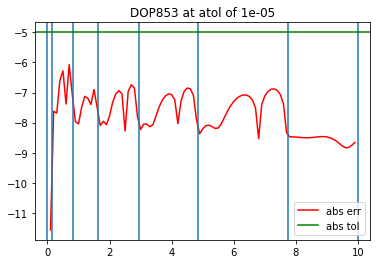

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


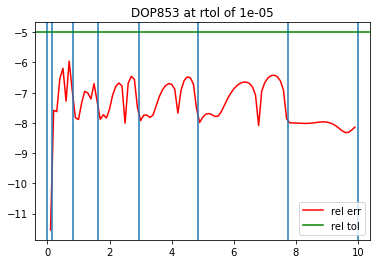

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [12]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


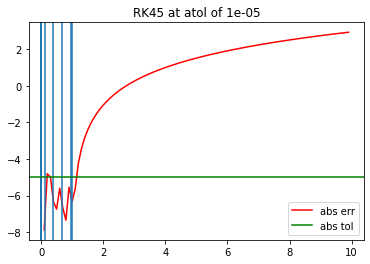

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


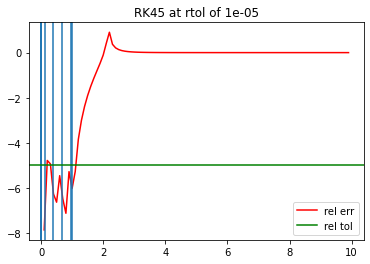

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


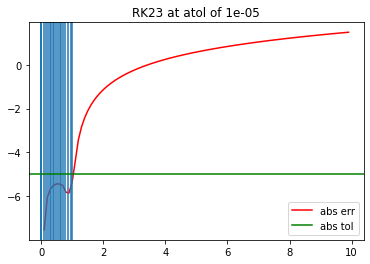

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


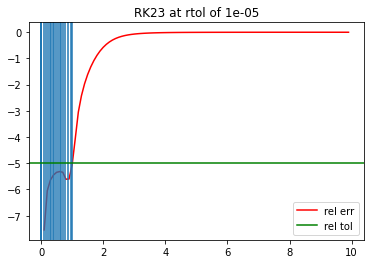

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


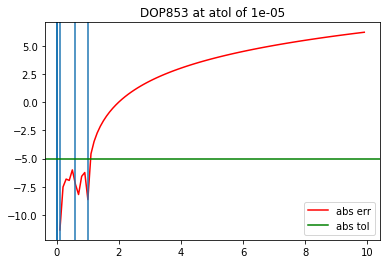

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


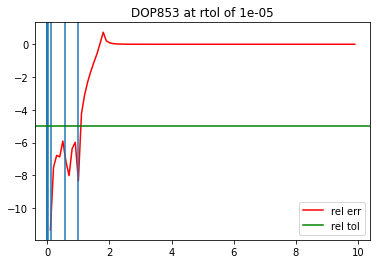

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [13]:
t_span_2 = [0, 1]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


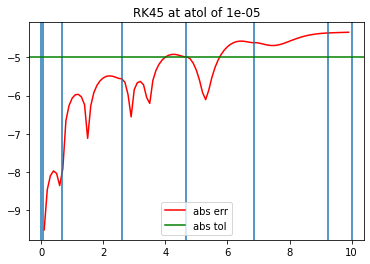

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


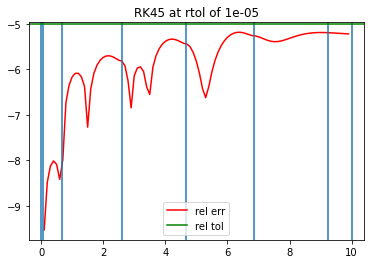

In [15]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:10: RuntimeWarning: invalid value encountered in double_scalars
  rel_err = [ abs(abs_err[i] / computed[0][i])  for i in range(len(t_eval)) ]
C:\Users\huago\AppData\Local\Temp/ipykernel_14860/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


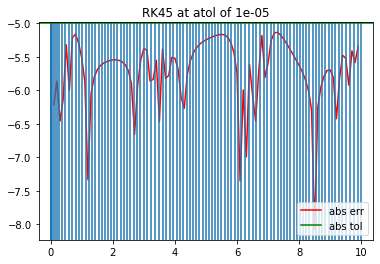

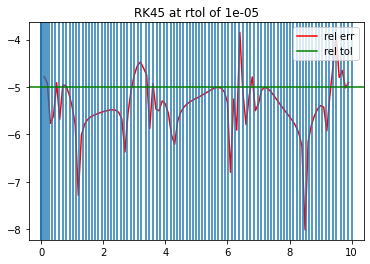

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    # return [100 * (sin(t) - y)]
    return [10 * (sin(t) - y)]

def solution4(t):
    # return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


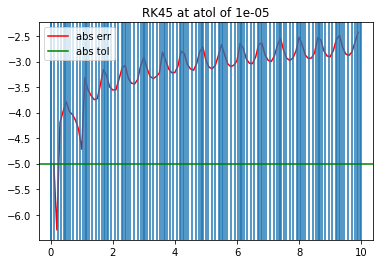

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


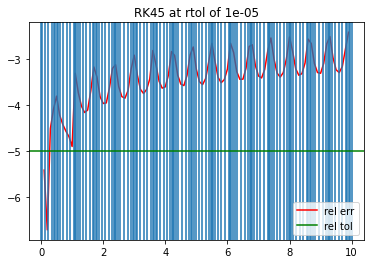

In [19]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


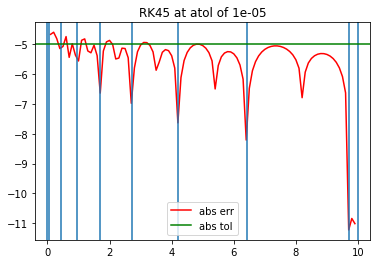

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


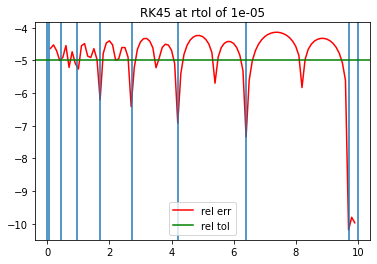

In [20]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


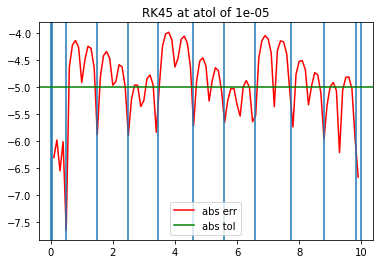

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


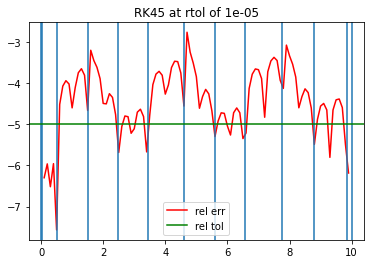

In [21]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


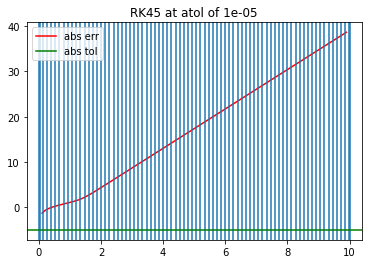

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


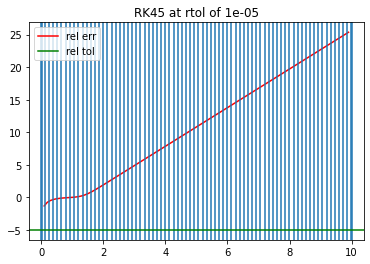

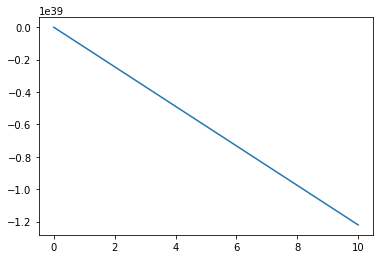

In [32]:
# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


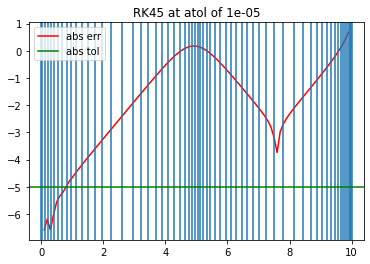

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


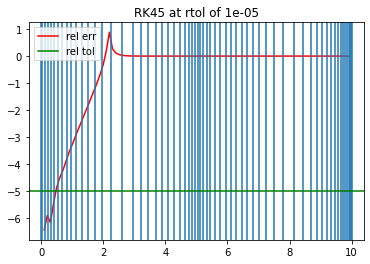

In [29]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


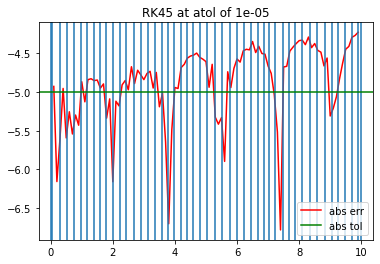

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


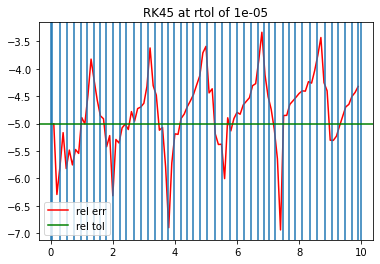

In [30]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(abs_err), label="abs err", color="r")


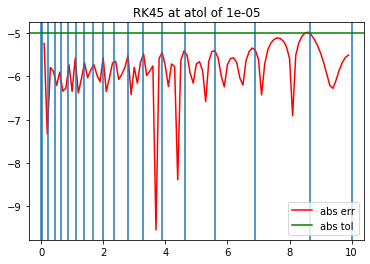

C:\Users\huago\AppData\Local\Temp/ipykernel_20928/765997156.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_eval, np.log10(rel_err), label="rel err", color="r")


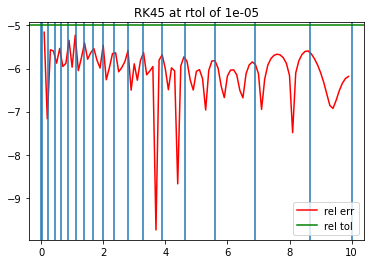

In [31]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y[0] + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)